In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
import matplotlib.pyplot as plt
plt.rc("font", family="AppleGothic")
plt.rc("axes", unicode_minus=False)

# 프리시즌 데이터 분석

In [3]:
preseason_df = pd.read_csv("./dataset/ml/Pre_Season_Batter.csv")
regular_season_df = pd.read_csv("./dataset/ml/Regular_Season_Batter.csv")

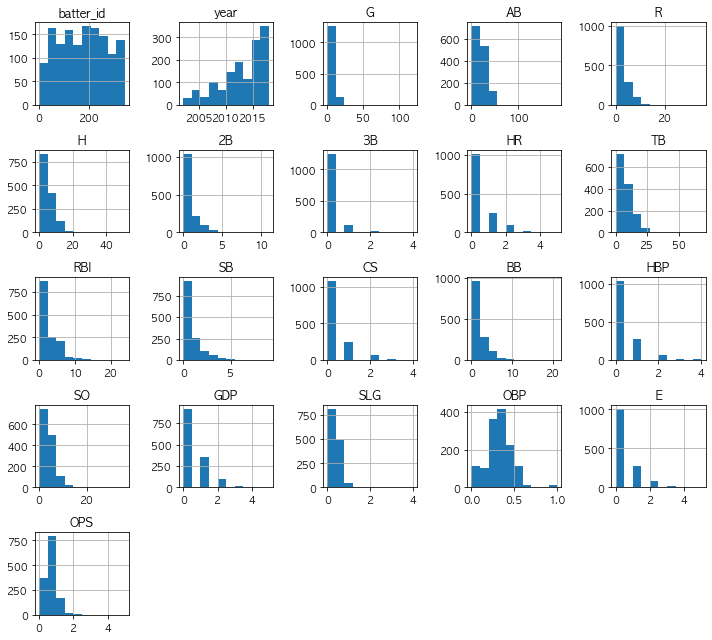

In [4]:
preseason_df.hist(figsize=(10,9))
plt.tight_layout()
plt.show()

In [5]:
regular_count = regular_season_df.groupby("year")["batter_id"].count().rename("regular")

In [6]:
presason_count = preseason_df.groupby("year")["batter_id"].count().rename("preseason")

In [7]:
pd.concat([regular_count,
           presason_count, 
           np.round(presason_count/regular_count,2).rename("ration")], axis=1).transpose().loc[:,2002:]

year,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
regular,43.00,54.00,68.00,73.00,85.00,98.00,115.00,124.00,130.00,151.0,174.0,194.00,186.00,207.00,213.00,217.00,227.0
preseason,12.00,19.00,28.00,37.00,36.00,43.00,61.00,66.00,72.00,75.0,87.0,104.00,117.00,134.00,153.00,167.00,182.0
ration,0.28,0.35,0.41,0.51,0.42,0.44,0.53,0.53,0.55,0.5,0.5,0.54,0.63,0.65,0.72,0.77,0.8


In [8]:
regular_season_df["new_idx"] = regular_season_df['batter_name'] + regular_season_df['year'].apply(str)

In [9]:
preseason_df["new_idx"] = preseason_df['batter_name'] + preseason_df['year'].apply(str)

In [10]:
intersection_idx = list(set(regular_season_df["new_idx"]).intersection(preseason_df["new_idx"]))

In [11]:
regular_season_new = regular_season_df.loc[regular_season_df["new_idx"].apply(lambda x: x in intersection_idx)].copy()

In [12]:
regular_season_new = regular_season_new.sort_values(by='new_idx' ).reset_index(drop=True)

In [13]:
preseason_new = preseason_df.loc[preseason_df ["new_idx"].apply(lambda x: x in intersection_idx)].copy()

In [14]:
preseason_new = preseason_new. sort_values(by='new_idx') .reset_index(drop=True)

In [15]:
print (regular_season_new.shape , preseason_new.shape)

(1358, 30) (1358, 30)


In [16]:
sum(regular_season_new["new_idx"] == preseason_new["new_idx"])

1358

In [17]:
correlation = regular_season_new["OPS"].corr(preseason_new["OPS"])

/Users/sd/works/recommender-system-study/venv/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


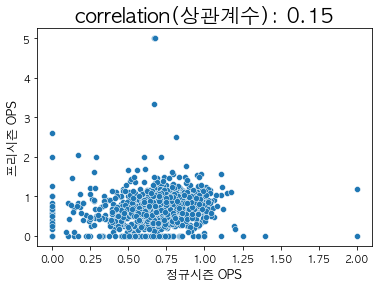

In [18]:
sns.scatterplot(regular_season_new["OPS"], preseason_new["OPS"]) 
plt.title('correlation(상관계수): ' + str(np.round(correlation, 2)), fontsize=20)
plt.xlabel("정규시즌 OPS", fontsize=12)
plt.ylabel("프리시즌 OPS", fontsize=12)
plt.show()